# Submission for Coursework 3
Team: Billie-Jo Powers, Jasmine Burgess, Mark Holcroft & Harry Ellingham  

In [3]:
# imports 
import sys
import pickle
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
sys.path.append('..')

## Introduction

Pig is a simple dice game of chance, widely-studied in academic literature for its interesting probabilistic features. This report re‐examines such a paper by Todd W. Neller and Clifton G.M. Presser. The aim of their paper is to find the optimal policy a player of the game Pig should use, calculated using the value iteration algorithm. At the time of publishing, classical value iteration was seen as too slow and states took too long to converge, and hence a ‘layered’ approach of working backwards was used. This works by using value iteration on subsets of the state space, ensuring these converge before moving onto the next subset. The paper found that the optimal policy is non‐smooth and includes unusual and unintuitive features.

## The 5 R's

In this report, we will be assessing both the original paper and our own work with regard to the 5Rs: Replicable, Re-Runnable, Repeatable, Reproducible, and Reusable. A summary of our assessment is as follows:

- Replicable: Replicable normally refers to other researchers being able to write new code that matches a conceptual descroption. The original publication provides ample pseudo-code and methodology which aids the replicability of their results. Some minor discrepancies are found regarding their score analytics, but overall the majority of results can be successfully replicated. Due to the nature of our work, we have provided similar methodology, and so hope the same level of replicability is present. 
- Re-Runnable: This requires code to be able to be run again when necessary. We are unable to comment extensively on the original publication regarding this attribute, as source code is not available for the majority of the results provided. Code for the game of Piglet was made available after communication with authors, which was written in Java. The code for our work can be found on the linked repository and can be run using Python 3.12.0 (the latest python at time of writing). 
- Repeatable: Code is considered repeatable when we can acheive the same result over multiple runs of the program. Again, due to the lack of available source code from Neller and Presser, we are unable to comment on how repeatable their results are. However, in our code, the results are all consistent across multiple runs of the program.
- Reproducible: Since reproducibility is usually referred to in the context of reusing original code, our commentary on the original publication is again limited for this R. Having said this, we were able with the Piglet code to successfully convert it into python and generate the same results. We argue that other results are not reproducible due to the lack of available source code. Our work has been used across all of the authors computers with the same results, which we believe indicates a good level of reproducibility. 
- Reusable: Reusable is perhaps one of the harder R's to assess in this context, as it refers to the ability to use and modify provided code to fit ones purpose. Our provided code should be reusable in the sense that the code is available via Github. In terms of any required modification, the rules of the game Pig can be easily altered in our code, although we cannot comment on how successful one would be trying to implement a variation of Pig such as Pig Dice. 


## The Game Pig
Like many games, Pig is simple to play, but difficult to play well. It is a dice game that traditionally involves two players and a six sided die, with the objective of being the first player to reach 100 points. After each roll, players are presented with the option to roll or hold - if a player rolls, they gain the chance to increase their turn score, whereas by holding they can bank their points by adding their turn score to their score total. If at any point a player rolls a 1, they lose their turn score. The play is passed onto the opponent after either banking or rolling a 1.

## Piglet - a Simplified Game of Pig

Prior to calculating an optimal policy for Pig, Neller and Presser motivated their methods using a simplified version of the game, aptly named "Piglet". In this version, a coin is used in place of a die, and landing on tails is set equivalent to rolling a one. Traditionally, the goal of Piglet is to reach 10 points first; however, the number of equations required to calculate the proability of winning from each possible state is still too large for a simple example, so we instead set a goal of 2. 

Let $P_{i,j,k}$ denote the probability of the player winning given that their score is $i$, the opponents score is $j$, and the current turn total is $k$. Using this notation, we recreate Figure 2 from Neller and Presser, which shows the result of applying value iteration to Piglet with a goal score of 2. We were able to confirm that our results gave the same final probabilities as Neller and Presser. 

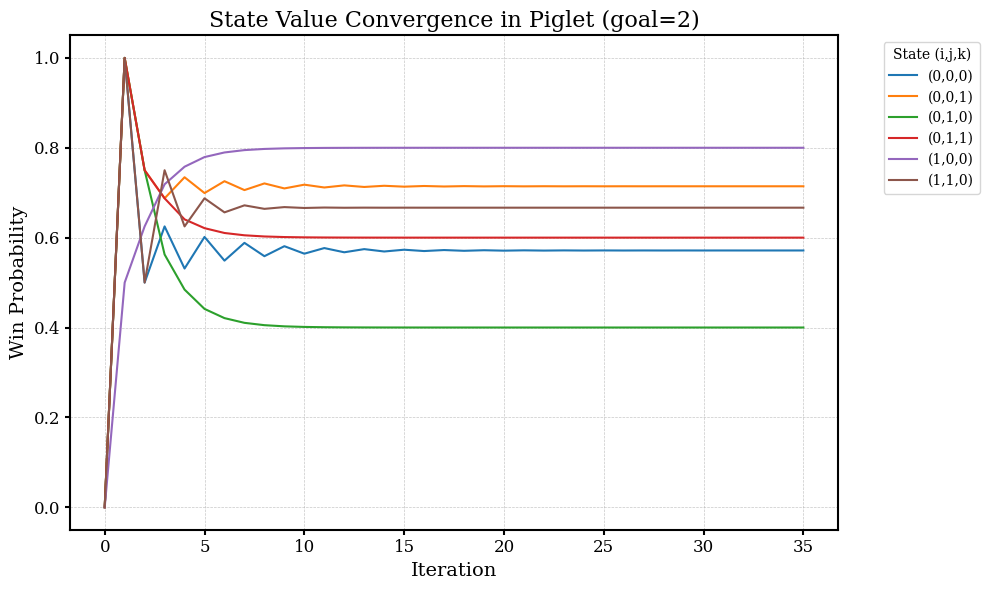

In [4]:
from piglet import PigletSolver
piglet_plotter = PigletSolver(goal = 2, epsilon = 10e-6)
piglet_plotter(convergence_plots=True)

A critical point of note can be drawn from the convergence plots - here, it is evident that the rate of convergence is non-constant across all states. In particular, states which are closer to the end of the game (with higher score sums) converge more quickly, whereas earlier states take much longer to reach their final value. The reason for this is that only states which correspond to a player win are assigned a reward of 1, and it takes time for these rewards to propagate through the state space via value updates. The solution for this, as used in the original paper, was layered value iteration. Here, rather than applying value iteration to all states at once, it is applied to subsets of states, beginning with the states closest to the reward states, and working backwards. The exact subsets are determined by the sum of the scores, such that the first subset is $\{P_{99, 99, 0}\}$, followed by the subset \{$P_{99,98,0}, P_{98,99,0}$\}, and so forth. This speeds up convergence, as earlier states are able to use fixed values for their value updates. For this reason, and for general reproducibility, we too use this approach in our algorithm.



## Surface Plot of Optimal Policy

We next focus on reproducing the results for Pig. As with Piglet, we use layered value iteration to find the optimal policy. Here we adopt the traditional rules of the game, with a six-sided die and a goal score of 100, although our code was designed to handle any combination of these. Figure 3 in Neller and Presser gives a plot of the optimal policy, for which our recreation is given below. The interpretation of the graph is that for states below the surface, one should roll again, and for states above the surface, the optimal choice is to hold. 

Our recreation has distinct similarities to that produced by Neller and presser, which indicates a good level of reproducibilty. Both policies share the overhanging feature and general ‘wave’ structure.

In [ ]:
# Due to pre-complilation of loops using the numba package, the optimal policy can be generated in minimal time
from notebook_writeup.optimised_layered_vi import pig_layered_value_iteration
 
die_size = 6
target_score = 100
max_turn = 100
values, policy = pig_layered_value_iteration(target_score=target_score, 
                                             die_sides=die_size, 
                                             max_turn=max_turn, 
                                             epsilon=1e-6)

In [ ]:
# We display our policy using the following plotting module
from notebook_writeup.plotting_tools import generate_box_plots
generate_box_plots(policy, title = 'Plot of Optimal Policy', pad=True, perspective = [-1.4, -2.2, 1])

### Extracting Reachable States 

Figures 5 and 6 of the original paper depict the optimal policy at all reachable states. Note here that the reachable states are calculated based on the assumption that the opponent could be playing using any strategy ‐ if they were to be playing optimally, these figures would be symmetric about the axis Player Score = Opponent Score. These figures have been reproduced below. They show clear similarities with those of the original paper, particularly the omission of states involving player scores of between 1 and 19, and the tendency to increase the maximum turn score when the opponent's score is higher.

Our recreation does exhibit slight deviations from Neller and Presser's results in regions where both players have high scores. These omissions occur for had-to-reach states, and as such they appear less often in our simulations. Hence we do not assume this to be an error in the original paper and, given more time spent simulating, we deem it likely that our plot would converge to that found by the original authors. 

In [ ]:
# reachable states are extractable from experiment (PLACEHOLDER)
with open('pickle_and_config_files/reachable_states.pkl', 'rb') as d:
    reachable_array = pickle.load(d)
generate_box_plots(reachable_array, title = 'Plot of Reachable States', perspective = [-1.4, -2.2, 1])

Another graph which was successfully replicated was Figure 4. Shown below, it depicts a cross‐section of the reachable states for an opponent score of 30, and includes the optimal boundary and the “hold at 20” heuristic as a benchmark for comparison. The graph was produced using simulation, and shares the same features and properties with that of the original paper. Note crucially that the reachable states are states which are reachable during any stage of the game when the opponent is on a score of 30 or less ‐ not only when the opponent is on a score of 30. 

In [ ]:
# we read in the appropriate cross section 
with open('pickle_and_config_files/reachable_states_vs_policy.pkl', 'rb') as f:
    policy = pickle.load(f)

In [ ]:
plt.figure(figsize=(8, 8))

# Show the two imshow layers
plt.imshow(policy['policy'], cmap='Blues', alpha=0.6)
plt.imshow(policy['reachable_states'], cmap='Reds', alpha=0.4)

# Axis labels
plt.xlabel("Player Score")
plt.ylabel("Opponent Score")

# Legend
policy_patch = mpatches.Patch(color='blue', alpha=0.6, label='Policy Region')
reachable_patch = mpatches.Patch(color='red', alpha=0.4, label='Reachable Region')

plt.legend(handles=[policy_patch, reachable_patch], loc='upper right')
plt.title("Policy vs Reachable State Overlay for Opponent Score = 30")
plt.grid(True)


ax = plt.gca()
ax.invert_yaxis()

plt.ylim((0,50))
# plt.savefig('../plots_and_graphs/policy_vs_reachables.png', bbox_inches = 'tight', dpi = 400)
plt.show()


notes on the above plot: I think it looks pretty shit. I will be rerunning the code which maps the state space for many more iterations. Hopefully that will give us a lot more smoothness on the red region

### Contours of Winning Probability

The final graph we reproduce from Teller and Presser is Figure 7, which gives the win probability contours for optimal play. This gives a visualisation of the probability of the optimal player winning given that the game is in state $(i,j,k)$. In particular, this contour gives the states for which the probability of winning is 3\%, 9\%, 27\%, and 81\%. Our reproduction of the graph is given below and is consistent with that found in the original paper.

In [ ]:
# make use of our final values outputted by the 
from notebook_writeup.plotting_tools import plot_isosurface_from_array

plot_isosurface_from_array(values, isovalues=[0.03, 0.09, 0.27, 0.81], perspective = [-2.5, -0.3, 1.2])

### Reproducing Score Analytics 

Neller and Presser conclude that in the scenario where both players are playing optimally, the player who goes first will win 53.06\% of the time ( i.e. $P_{0,0,0}$ = 0.5306). To reproduce these results we used simulation, with 100,000 replications and seed 123. Using our code, we found that the player who begins the game wins with probability 53.047\%. The code used for these simulations is available in the files called below.

In [ ]:
# The following function complete 100,000 games of pig and outputs the probability that player 1 wins
# We begin with both players using the optimal strategy
from competition import Competition
competition_function = Competition(policy, policy, replications=100000, seed = 123)
win_percentage = competition_function()
print(f'For two optimal policies playing against each other, player 1 wins {round(win_percentage*100, 3)}% of the time.')

In [ ]:
# Standard error for optimal play
se = np.sqrt(win_percentage * (1 - win_percentage) / 100000)

# Confidence interval for optimal play
ci_lower = win_percentage - 1.96 * se
ci_upper = win_percentage + 1.96 * se

print(f"95% Confidence Interval: [{ci_lower:.3f}, {ci_upper:.3f}]")

We also note that our value $P_{0,0,0}$ was found to be 0.5306, which is consistent with Neller and Pressers results. 

In [ ]:
# Note that this win percentage is the same as given in the value function
float(values[0,0,0] * 100)

Neller and Presser also investigated the outcome when the optimal policy is played against the "hold at 20" policy. To recreate these results, we again employed a simulation technique.

In [ ]:
# We have another class called opponents which can make policies for us to play against if we want to 
# We begin by creating a hold at 20 policy
from competition import Opponents
hold_at_20_policy = Opponents.hold_at_n(20)

Neller and Presser conclude that when the optimal player goes first, they win approximately 58.74\% of the time, and when the "hold at 20" player goes first, they win approximately 47.76\% of the time. Our results for these cases are detailed below, again generated using simulations with 100,000 replications and a starting seed of 123. 

In our simulations, when the optimal player goes first, we find that they win 57.21\% of the games. Since this result is below what was expected from Neller and Pressers results, we include a 95\% confidence interval for this result, which again indicates that the optimal player is expected to win less than the authors claim.

We also found in our simulation that when the hold at 20 player goes first, they win 49.518\% fo the time which is again a deviation from the results found by Teller and Nelson. We again include a 95\% confidence interval for this result, which is above the author's claim.

In [ ]:
# Competition code for optimal policy vs hold at 20 policy

competition_function_h20 = Competition(policy, hold_at_20_policy, replications=100000, seed = 123)
win_percentage_h20 = competition_function_h20()
print(f'For optimal policy playing against hold at 20, optimal player wins {round(win_percentage_h20*100, 3)}% of the time.')

In [ ]:
# Standard error for optimal vs hold at 20
se = np.sqrt(win_percentage_h20 * (1 - win_percentage_h20) / 100000)

# Confidence interval for optimal vs hold at 20
ci_lower = win_percentage_h20 - 1.96 * se
ci_upper = win_percentage_h20 + 1.96 * se

print(f"95% Confidence Interval: [{ci_lower:.3f}, {ci_upper:.3f}]")

In [ ]:
# Competition code for hold at 20 vs optimal policy

competition_function_h20_2 = Competition(hold_at_20_policy, policy, replications=100000, seed = 123)
win_percentage_h20_2 = competition_function_h20_2()
print(f'For optimal policy playing against hold at 20, h20 player wins {round(win_percentage_h20_2*100, 3)}% of the time.')

In [ ]:
# Standard error for hold at 20 vs optimal policy
se_2 = np.sqrt(win_percentage_h20_2 * (1 - win_percentage_h20_2) / 100000)

# Confidence interval for hold at 20 vs optimal policy
ci_lower_2 = win_percentage_h20_2 - 1.96 * se_2
ci_upper_2 = win_percentage_h20_2 + 1.96 * se_2

print(f"95% Confidence Interval: [{ci_lower_2:.3f}, {ci_upper_2:.3f}]")

To further investigate this discrepancy, we also assessed the performance of the optimal policy when played against both the "hold at 21" and "hold at 22" policies. The code for each is provided below.

In the "hold at 21" case, we find that when the optimal player goes first they win 58.001\% of the time, with the confidence interval still falling below Neller and Pressers claimed value for the "hold at 20". Likewise, when the "hold at 21" player goes first, they win 48.57\% of the time, with the confidence interval still falling strictly above the claimed result from Neller and Presser.  This motivated our decision to implement a "hold at 22" policy. 

In the "hold at 22" case, we find that when the optimal player goes first, they win 48.57\% of the time, and the confidence interval contains the value given by Neller and Presser; similarly, when the "hold at 22" player goes first, they win 47.859\% of the time, and the value given by Neller and Presser again falls within the confidence interval. In Neller and Presser, the method for which they found their results is not specified, and hence it is unclear whether this is the method they used or whether this is simply coincidental. 

In [ ]:
# Creating a hold at 21 policy
hold_at_21_policy = Opponents.hold_at_n(21)

# Competition for optimal policy vs hold at 21 
competition_function_h21 = Competition(policy, hold_at_21_policy, replications=100000, seed = 123)
win_percentage_h21 = competition_function_h21()
print(f'For optimal policy playing against hold at 21, optimal player wins {round(win_percentage_h21*100, 3)}% of the time.')

In [ ]:
# Standard error for optimal policy vs hold at 21 
se_n21 = np.sqrt(win_percentage_h21 * (1 - win_percentage_h21) / 100000)

# Confidence interval for optimal policy vs hold at 21
ci_lower_n21 = win_percentage_h21 - 1.96 * se_n21
ci_upper_n21 = win_percentage_h21 + 1.96 * se_n21

print(f"95% Confidence Interval: [{ci_lower_n21:.3f}, {ci_upper_n21:.3f}]")

In [ ]:
# Competition code for hold at 21 vs optimal policy
competition_function_h21_2 = Competition(hold_at_21_policy, policy, replications=100000, seed = 123)
win_percentage_h21_2 = competition_function_h21_2()
print(f'For optimal policy playing against hold at 20, optimal player wins {round(win_percentage_h21_2*100, 3)}% of the time.')

In [ ]:
# Standard error for hold at 21 vs optimal policy
se_n21_2 = np.sqrt(win_percentage_h21_2 * (1 - win_percentage_h21_2) / 100000)

# Confidence interval for hold at 21 vs optimal policy
ci_lower_n21_2 = win_percentage_h21_2 - 1.96 * se_n21_2
ci_upper_n21_2 = win_percentage_h21_2 + 1.96 * se_n21_2

print(f"95% Confidence Interval: [{ci_lower_n21_2:.3f}, {ci_upper_n21_2:.3f}]")

In [ ]:
# Creating a hold at 22 policy 
hold_at_22_policy = Opponents.hold_at_n(22)

# Competition for optimal policy vs hold at 22
competition_function_h22 = Competition(policy, hold_at_22_policy, replications=100000, seed = 123)
win_percentage_h22 = competition_function_h22()
print(f'For optimal policy playing against hold at 20, optimal player wins {round(win_percentage_h22*100, 3)}% of the time.')

In [ ]:
# Standard error for optimal policy vs hold at 22
se_n22 = np.sqrt(win_percentage_h22 * (1 - win_percentage_h22) / 100000)

# Confidence interval for optimal policy vs hold at 22
ci_lower_n22 = win_percentage_h22 - 1.96 * se_n21_2
ci_upper_n22 = win_percentage_h22 + 1.96 * se_n21_2

print(f"95% Confidence Interval: [{ci_lower_n22:.3f}, {ci_upper_n22:.3f}]")

In [ ]:
# Competition for hold at 22 vs optimal policy
competition_function_h22_2 = Competition(hold_at_22_policy, policy, replications=100000, seed = 123)
win_percentage_h22_2 = competition_function_h22_2()
print(f'For optimal policy playing against hold at 20, optimal player wins {round(win_percentage_h22_2*100, 3)}% of the time.')

In [ ]:
# Standard error for hold at 22 vs optimal policy
se_n22_2 = np.sqrt(win_percentage_h22_2 * (1 - win_percentage_h22_2) / 100000)

# Confidence interval for hold at 22 vs optimal policy
ci_lower_n22_2 = win_percentage_h22_2 - 1.96 * se_n22_2
ci_upper_n22_2 = win_percentage_h22_2 + 1.96 * se_n22_2

print(f"95% Confidence Interval: [{ci_lower_n22_2:.3f}, {ci_upper_n22_2:.3f}]")

## Conclusion

Our aims when beginning this report were two-fold - to assess whether the original paper was correct in its findings, and to determine how easily and to what degree these results could be reproduced. Based on our graphical output and simulation metrics, it is evident that the results are of a high quality and, accounting for a margin of error that could be attributed to a lack of convergence, correct. This is especially true of the optimal policy, from which all other results can be derived.

Regarding reproducibility, there are certain areas in which the report could have eased the reproduction process. The first of these is a lack of clarity in how the plots were made - whilst it was possible to replicate all figures using Python, this process involved fine-tuning methods designed for other purposes. For example, Figure 4 was recreated using the Isosurface feature within Plotly, whose primary purpose is plotting 3D surfaces, not volumes. It was also sometimes unclear precisely what had been plotted - this was particularly evident in Figure 4, where it was not immediately clear how the reachable states were defined.

Other than the specific plots and metrics, the inclusion of such details as the software and any packages used were not specified, including their version. Another improvement would be to indicate what seed was used and how many realisations were made such that simulation results could be compared exactly.

Despite some minor challenges, the replication was ultimately successful, with all key graphs and primary metrics accurately reproduced. In this regard, the original paper’s findings were validated, particularly concerning the optimal policy from which all other results derive. However, to enhance reproducibility, future works should place greater emphasis on clearly specifying the methods used to produce figures, detailing the software environments and package versions, and explicitly stating simulation settings such as random seeds and the number of realisations. These small but impactful improvements would significantly support transparent and exact replication efforts.